In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. EDA (Cleaning, Visualisation, Analysis and Feature Engineering)

## 1.1. Pre-load the Data Dictionary File here for easy reference...

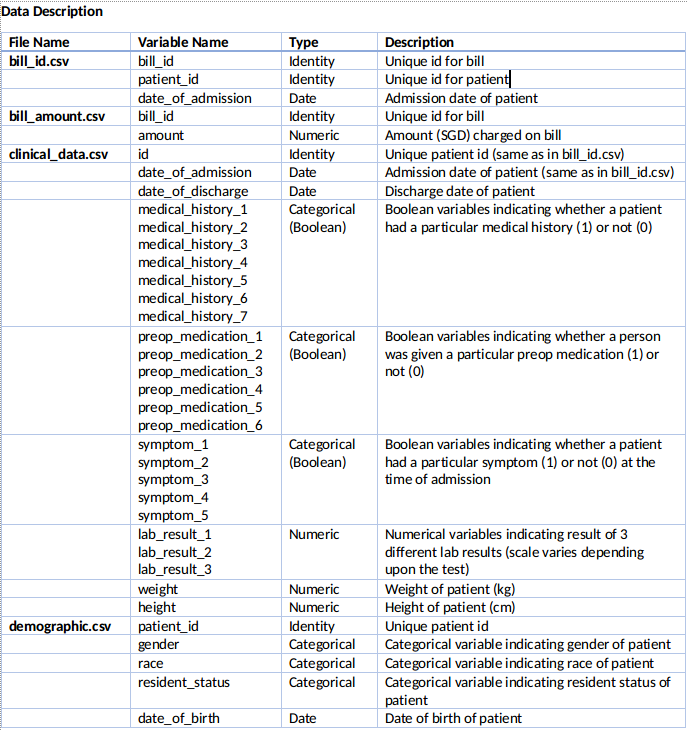

## 1.2. Load the Datasets
### bill, billing amount, clinical records and patient demographics

In [2]:
df_bill = pd.read_csv('bill_id.csv')
df_bill_amount = pd.read_csv('bill_amount.csv')

df_clinical = pd.read_csv('clinical_data.csv')
df_demographic = pd.read_csv('demographics.csv')

In [3]:
# Check the Dimensions for all the datasets
df_bill.shape, df_bill_amount.shape, df_clinical.shape, df_demographic.shape

((13600, 3), (13600, 2), (3400, 26), (3000, 5))

In [4]:
# Bill and Bill amount have same number of records
# Check for uniqueness
df_bill['patient_id'].nunique(), df_bill_amount['bill_id'].nunique()

(3000, 13600)

In [5]:
# Check for uniqueness
df_clinical['id'].nunique(), df_demographic['patient_id'].nunique()

(3000, 3000)

### 1.2.1 Bill

In [6]:
df_bill.sample(5, random_state=1)

,bill_id,patient_id,date_of_admission
804,5235258272,ff727bbb751f38bceedaf6f6963ece23,2011-04-21
11857,2656356690,92bcc6d8ecbb238e1240a6bdfec58cfe,2015-05-18
1851,3573667854,94394b3a8b53b5096a0e7b2c4514d450,2011-09-10
11890,5352869179,97e30fdf6bd3f8bac9b0a0087a25d172,2015-05-25
8955,8586966649,b1e8ed2ba3683648e9b506756d33d86f,2014-04-17


In [7]:
# Check for null values in all columns
df_bill.isnull().sum()

bill_id              0
patient_id           0
date_of_admission    0
dtype: int64

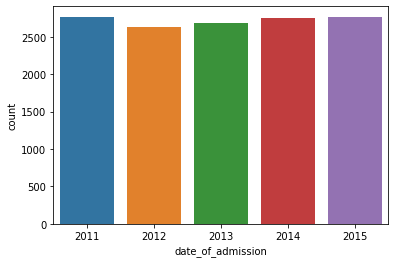

In [8]:
# Plot to quickly see all values and count
fig = plt.plot(figsize = (15, 10))
sns.countplot(x=pd.DatetimeIndex(df_bill['date_of_admission']).year, data=df_bill)

### 1.2.2 Bill Amount

In [9]:
df_bill_amount.sample(5, random_state=1)

,bill_id,amount
804,5437699054,1447.090262
11857,3802505264,583.417477
1851,141991175,831.885666
11890,2526352816,1067.098981
8955,4169756098,1361.288360


In [10]:
# Check for null values in all columns
df_bill_amount.isnull().sum()

bill_id    0
amount     0
dtype: int64

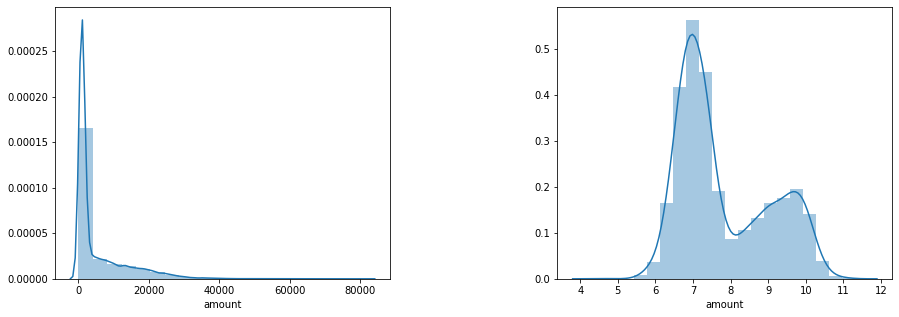

In [11]:
# Plot the Distribution of the Amount and check for invalid values
# Check for Invalid Values (negative, 0, or overly large values)
fig, ax = plt.subplots(1, 2, figsize = (15, 5), squeeze=False)
fig.subplots_adjust(wspace=0.5)

# Scale the Values in Log to see the distribution clearly
sns.distplot(df_bill_amount['amount'], bins=20, kde=True, ax=ax[0][0])
sns.distplot(np.log(df_bill_amount['amount']), bins=20, kde=True, ax=ax[0][1])

In [12]:
# Check the Statistical Analysis
df_bill_amount.describe(include='all')

,bill_id,amount
count,1.360000e+04,13600.000000
mean,5.007147e+09,5464.767783
std,2.885919e+09,7717.479509
min,5.584120e+05,79.496707
25%,2.485853e+09,950.689008
50%,4.992958e+09,1516.951136
75%,7.524563e+09,7307.056573
max,9.999633e+09,81849.751340


In [13]:
df_bill_amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13600 entries, 0 to 13599
Data columns (total 2 columns):
bill_id    13600 non-null int64
amount     13600 non-null float64
dtypes: float64(1), int64(1)
memory usage: 212.6 KB


In [14]:
# Combine Bill and Bill Amount (aggregated for each patient id and take the last admission date)
df_bill_agg = df_bill.set_index('bill_id').join(df_bill_amount.set_index('bill_id')).reset_index()
df_bill_agg.sample(10)

,bill_id,patient_id,date_of_admission,amount
1779,5236468148,7c179f5b7675921056cc056d10c6dd02,2011-08-25,8288.343102
12063,1572680096,5aa89ed6f7e0e79bf710c2093ee775d6,2015-06-12,6986.810562
11196,1955937072,ce0b186ac464285f7ca0b78fe5c08360,2015-02-24,643.310494
7357,8947339281,64d46237cd4ef1b55722a2d3d0eed8b5,2013-09-24,975.708381
5299,2439183271,9bd8ee9e39d957d60e8eba93aed49434,2012-12-19,1237.945959
11874,9022005901,54870e4fe119ab18e9eb115e3279a956,2015-05-21,945.152818
2059,8251683756,0deef37fa953cc725d618a34018f2a76,2011-10-02,807.553214
4599,264347095,3922379f55e5c9bf132bb76aeae94584,2012-09-11,1069.906675
9638,7305847604,2c049067062a739106010da414947606,2014-07-07,1483.425427
6687,5442192689,9d266dd42217e5275f5c35cacd6bf2ef,2013-06-21,6903.213862


In [15]:
# Aggregate the Amount by Patient ID and Take only the latest date of admission
# Amount is the Target Variable, Engineer the Min, Max, Mean and Sum to have multiple targets
# I find that this is more useful instead of just having 1 target variable
df_bill_agg = df_bill_agg.groupby('patient_id').aggregate({'date_of_admission': 'max', 'amount': ['min', 'max', 'mean', 'sum']}).reset_index()
df_bill_agg.columns = df_bill_agg.columns.map('_'.join)

In [16]:
# View sample records, this dataframe will be combined with the clinical data after cleaning and aggregation
df_bill_agg.sample(10)

,patient_id_,date_of_admission_max,amount_min,amount_max,amount_mean,amount_sum
703,3ac4ef038b474ddc3f1b890abb2c5eb9,2011-08-23,1139.098629,11896.947608,5408.610737,21634.442948
691,39ae409e08662b3a9ee1d2e39b33914f,2014-02-28,967.371234,24276.076025,8665.642643,34662.570571
1552,8747c87df0c20b520b8ea1ee12c76b1f,2011-03-04,1095.616109,13159.516785,5495.428665,21981.714662
1757,9a099c5e88bd9ef6873cb57d0d635ad0,2012-11-08,542.634250,8948.871852,2808.727013,11234.908053
2459,d22cd420bbf2136af8018ef56d20ff16,2011-12-27,915.919249,16992.477099,6057.531236,24230.124945
221,11cef2580d657ccd67f94a53d73113f2,2011-09-12,310.590070,9603.913415,3538.115641,14152.462565
562,2e1657639bfa3ff5d6787fea89461281,2015-08-21,495.341064,18948.930371,5383.999068,43071.992542
627,34241ab928942761aeac1a57dc202ec9,2011-05-02,739.208840,15679.904089,4967.296341,19869.185365
2831,f252799ac123b60253825102475dba9d,2012-12-23,734.812040,20133.241331,4531.616406,36252.931246
214,1152a2db862ff814518e16254bbe85c0,2011-09-16,586.166521,8692.736514,2883.277192,11533.108770


### NOTES:
- having 4 target variables will give flexibility in the prediction and I think this is useful for patients and insurance industries to serve as a benchmark
- min amount gives indication the lowest bracket for a one time clinical appointment cost given the conditions and medications
- mean amount gives indication of overall average for patients with multiple visits, helps to prepare financially and for insurance industries with multiple claims
- max amount gives the worse case scenario overall
- amount sum, it is useful but highly dependent on the number of clinical appointments

All these can be considered later for modeling as an important feature

### 1.2.3 Clinical Records

In [17]:
df_clinical.sample(5, random_state=1)

,id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,...,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height
605,6af0cf21feff53afbf51fe896167e1dd,2011-11-12,2011-11-23,0,1.0,0,0,0.0,0,1,...,1,1,1,1,0,14.9,27.8,102.0,70.2,160.0
3359,ce90c139c70bc6ede290a999bf413a2b,2015-12-03,2015-12-16,0,1.0,No,0,0.0,0,0,...,0,0,1,1,0,15.2,26.3,117.0,85.4,165.0
2440,3dacd463852675c5dbb38f4bdc2e7322,2014-07-21,2014-08-07,1,0.0,0,0,0.0,0,0,...,1,1,0,1,1,12.6,27.2,84.0,86.3,160.0
1661,e711730a0e42ae105273d5c669b194f5,2013-06-17,2013-06-26,0,0.0,0,0,0.0,0,0,...,1,1,1,0,0,16.9,28.5,80.0,73.0,166.0
3312,85b49f9bb476f4f694f996c394ed5ea9,2015-11-12,2015-11-21,0,1.0,1,0,1.0,0,0,...,0,1,1,1,1,16.2,28.0,113.0,101.0,174.0


In [18]:
# Check if the Columns are in their proper data types, check individually
df_clinical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 26 columns):
id                    3400 non-null object
date_of_admission     3400 non-null object
date_of_discharge     3400 non-null object
medical_history_1     3400 non-null int64
medical_history_2     3167 non-null float64
medical_history_3     3400 non-null object
medical_history_4     3400 non-null int64
medical_history_5     3096 non-null float64
medical_history_6     3400 non-null int64
medical_history_7     3400 non-null int64
preop_medication_1    3400 non-null int64
preop_medication_2    3400 non-null int64
preop_medication_3    3400 non-null int64
preop_medication_4    3400 non-null int64
preop_medication_5    3400 non-null int64
preop_medication_6    3400 non-null int64
symptom_1             3400 non-null int64
symptom_2             3400 non-null int64
symptom_3             3400 non-null int64
symptom_4             3400 non-null int64
symptom_5             3400 non-null int64
lab

In [19]:
# Check for null values in all columns
df_clinical.isnull().sum()

id                      0
date_of_admission       0
date_of_discharge       0
medical_history_1       0
medical_history_2     233
medical_history_3       0
medical_history_4       0
medical_history_5     304
medical_history_6       0
medical_history_7       0
preop_medication_1      0
preop_medication_2      0
preop_medication_3      0
preop_medication_4      0
preop_medication_5      0
preop_medication_6      0
symptom_1               0
symptom_2               0
symptom_3               0
symptom_4               0
symptom_5               0
lab_result_1            0
lab_result_2            0
lab_result_3            0
weight                  0
height                  0
dtype: int64

(0.0, 1.0, 0.0, 1.0)

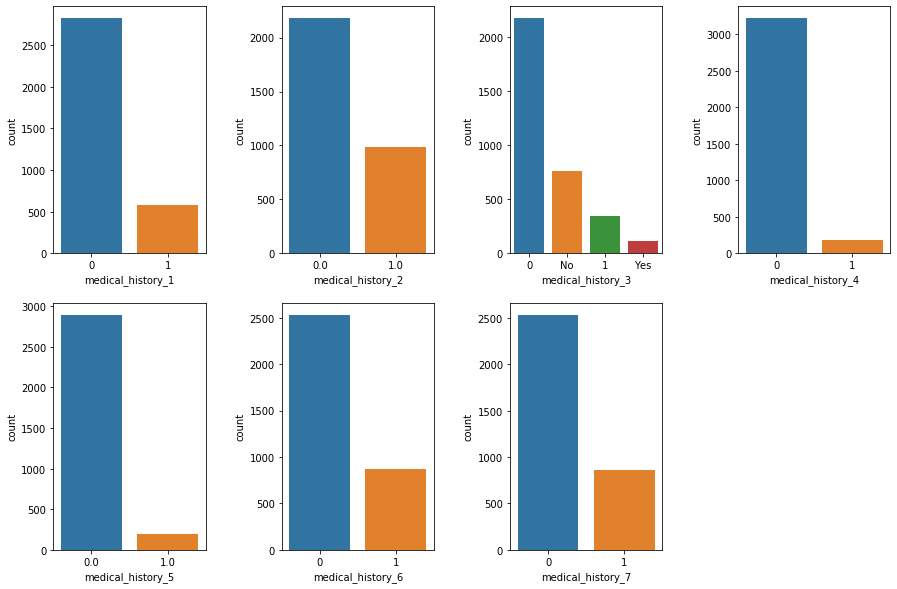

In [20]:
# Medical Data
fig, ax = plt.subplots(2, 4, figsize = (15, 10))
fig.subplots_adjust(wspace=0.5)

sns.countplot(x='medical_history_1', data=df_clinical, ax=ax[0][0])
sns.countplot(x='medical_history_2', data=df_clinical, ax=ax[0][1])
sns.countplot(x='medical_history_3', data=df_clinical, ax=ax[0][2])
sns.countplot(x='medical_history_4', data=df_clinical, ax=ax[0][3])
sns.countplot(x='medical_history_5', data=df_clinical, ax=ax[1][0])
sns.countplot(x='medical_history_6', data=df_clinical, ax=ax[1][1])
sns.countplot(x='medical_history_7', data=df_clinical, ax=ax[1][2])
ax[-1, -1].axis('off')

In [21]:
# Perform some Data Correction...
# Need to change 0.0 to 0, 1.0 to 1 and fill all null values
df_clinical['medical_history_2'].fillna(value=0)
df_clinical['medical_history_2'] = np.where(df_clinical['medical_history_2'] == 0.0, 0, 1)
df_clinical['medical_history_5'].fillna(value=0)
df_clinical['medical_history_5'] = np.where(df_clinical['medical_history_5'] == 0.0, 0, 1)

# Need to change No to 0, Yes to 1
df_clinical['medical_history_3'].replace(['Yes', 'No'], [1, 0], inplace=True)
df_clinical['medical_history_3'] = df_clinical['medical_history_3'].astype(int)

(0.0, 1.0, 0.0, 1.0)

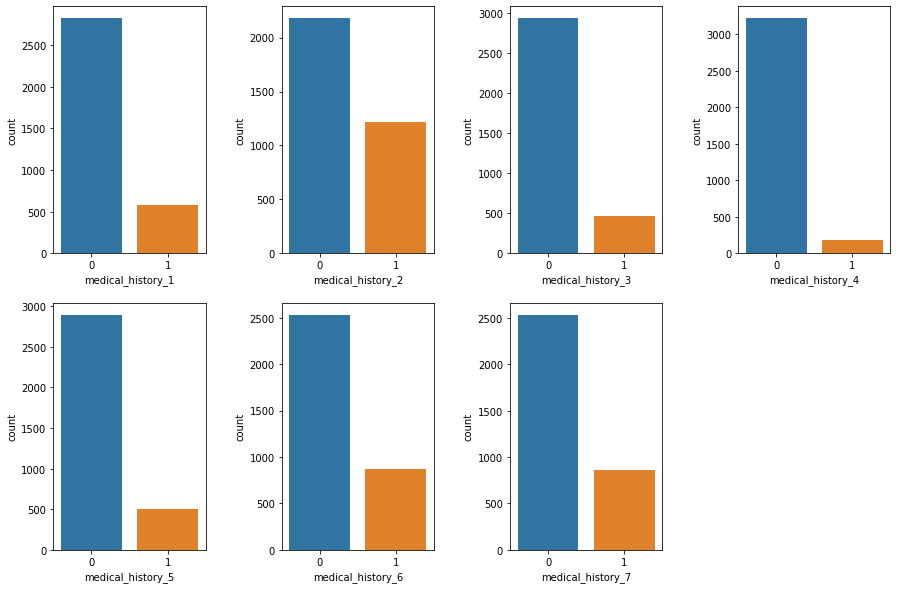

In [22]:
# Display the Corrected Medical Data
fig, ax = plt.subplots(2, 4, figsize = (15, 10))
fig.subplots_adjust(wspace=0.5)

sns.countplot(x='medical_history_1', data=df_clinical, ax=ax[0][0])
sns.countplot(x='medical_history_2', data=df_clinical, ax=ax[0][1])
sns.countplot(x='medical_history_3', data=df_clinical, ax=ax[0][2])
sns.countplot(x='medical_history_4', data=df_clinical, ax=ax[0][3])
sns.countplot(x='medical_history_5', data=df_clinical, ax=ax[1][0])
sns.countplot(x='medical_history_6', data=df_clinical, ax=ax[1][1])
sns.countplot(x='medical_history_7', data=df_clinical, ax=ax[1][2])
ax[-1, -1].axis('off')

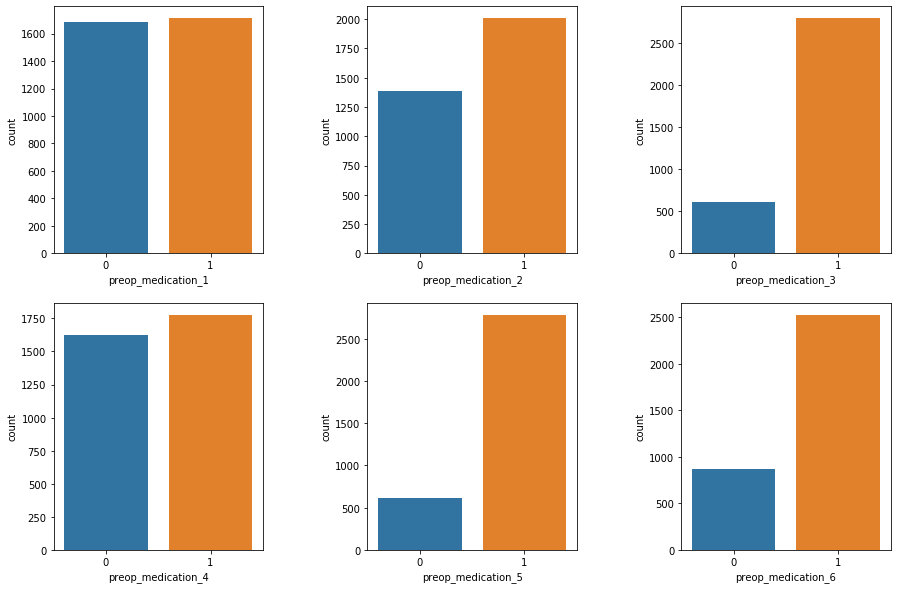

In [23]:
# PreOp Medication
fig, ax = plt.subplots(2, 3, figsize = (15, 10))
fig.subplots_adjust(wspace=0.5)

sns.countplot(x='preop_medication_1', data=df_clinical, ax=ax[0][0])
sns.countplot(x='preop_medication_2', data=df_clinical, ax=ax[0][1])
sns.countplot(x='preop_medication_3', data=df_clinical, ax=ax[0][2])
sns.countplot(x='preop_medication_4', data=df_clinical, ax=ax[1][0])
sns.countplot(x='preop_medication_5', data=df_clinical, ax=ax[1][1])
sns.countplot(x='preop_medication_6', data=df_clinical, ax=ax[1][2])

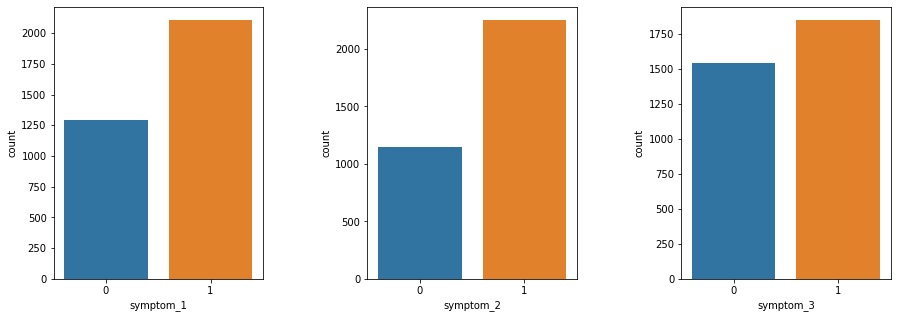

In [24]:
# Symptoms
fig, ax = plt.subplots(1, 3, figsize = (15, 5), squeeze=False)
fig.subplots_adjust(wspace=0.5)

sns.countplot(x='symptom_1', data=df_clinical, ax=ax[0][0])
sns.countplot(x='symptom_2', data=df_clinical, ax=ax[0][1])
sns.countplot(x='symptom_3', data=df_clinical, ax=ax[0][2])

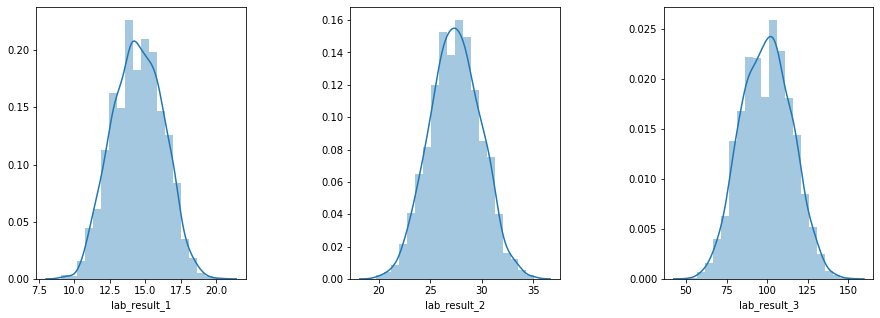

In [25]:
# Lab Results
# Check for Invalid Values (negative, 0, or overly large values)
fig, ax = plt.subplots(1, 3, figsize = (15, 5), squeeze=False)
fig.subplots_adjust(wspace=0.5)
sns.distplot(df_clinical['lab_result_1'], bins=20, kde=True, ax=ax[0][0])
sns.distplot(df_clinical['lab_result_2'], bins=20, kde=True, ax=ax[0][1])
sns.distplot(df_clinical['lab_result_3'], bins=20, kde=True, ax=ax[0][2])

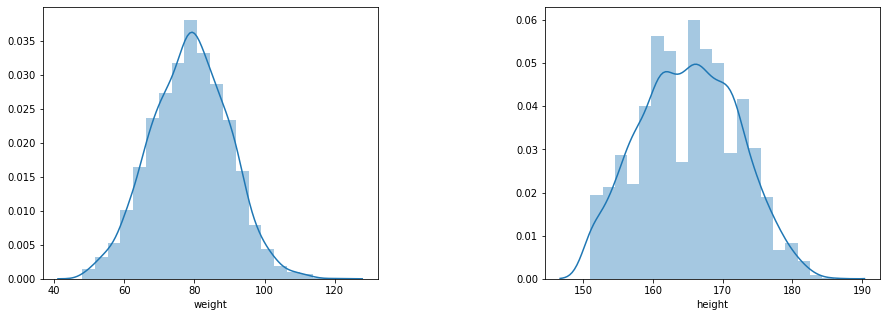

In [26]:
# Weight and Height
# Check for Invalid Values (negative, 0, or overly large values)
fig, ax = plt.subplots(1, 2, figsize = (15, 5), squeeze=False)
fig.subplots_adjust(wspace=0.5)
sns.distplot(df_clinical['weight'], bins=20, kde=True, ax=ax[0][0])
sns.distplot(df_clinical['height'], bins=20, kde=True, ax=ax[0][1])

In [27]:
# For Clinical Data, need to inspect if this is just one record per patient or multiple records per patient
# this information will be used later when joining the tables
df_clinical['id'].nunique(), df_clinical['id'].count()

(3000, 3400)

In [28]:
# Clinical Data seems to have a one to many mapping, need to check the dates of admission or discharge
df_clinical_grouped = df_clinical.groupby(['id'])[['date_of_discharge']].agg('count').reset_index()
df_clinical_grouped_cond = df_clinical_grouped['date_of_discharge'] > 1
df_clinical_grouped[df_clinical_grouped_cond].sample(3)

,id,date_of_discharge
442,24553fcc13c2f2db8686e5cf622a5092,2
1773,9bd6c98b5ac2e0532016e75009e0ed41,2
2355,c9d4033654ba391e434837878c1a36ac,2


### Sample Records...
1392260eb56ee15bf08b3343c11f16e4, c237b1af83870ddcb5c74a42f23a1131, fdf8e5d36473c09a2700bbceee7196ab

In [29]:
# Check the sampled data 1 and see the difference
df_clinical[df_clinical['id'] == '1392260eb56ee15bf08b3343c11f16e4']

,id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,...,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height
129,1392260eb56ee15bf08b3343c11f16e4,2011-03-12,2011-03-26,1,0,1,0,0,0,1,...,1,1,1,1,0,16.2,27.8,83.0,81.2,166.0
559,1392260eb56ee15bf08b3343c11f16e4,2011-10-18,2011-10-30,0,1,0,0,1,0,0,...,1,0,1,1,1,14.2,25.2,92.0,82.2,166.0


In [30]:
# Check the sampled data 2 and see the difference
df_clinical[df_clinical['id'] == 'c237b1af83870ddcb5c74a42f23a1131']

,id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,...,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height
417,c237b1af83870ddcb5c74a42f23a1131,2011-08-13,2011-08-21,1,0,0,0,0,0,1,...,1,1,1,1,0,14.8,25.4,90.0,91.6,154.0
438,c237b1af83870ddcb5c74a42f23a1131,2011-08-25,2011-09-03,0,1,0,0,0,0,0,...,1,1,0,0,1,14.9,27.5,115.0,92.6,154.0


In [31]:
# Check the sampled data 3 and see the difference
df_clinical[df_clinical['id'] == 'fdf8e5d36473c09a2700bbceee7196ab']

,id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,...,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height
857,fdf8e5d36473c09a2700bbceee7196ab,2012-04-07,2012-04-13,1,1,0,0,0,1,0,...,1,0,1,1,1,17.3,28.4,108.0,66.4,173.0
2886,fdf8e5d36473c09a2700bbceee7196ab,2015-04-07,2015-04-20,0,1,0,0,0,0,0,...,1,1,0,1,1,13.0,24.8,88.0,61.4,173.0


In [32]:
df_clinical.columns

Index(['id', 'date_of_admission', 'date_of_discharge', 'medical_history_1',
       'medical_history_2', 'medical_history_3', 'medical_history_4',
       'medical_history_5', 'medical_history_6', 'medical_history_7',
       'preop_medication_1', 'preop_medication_2', 'preop_medication_3',
       'preop_medication_4', 'preop_medication_5', 'preop_medication_6',
       'symptom_1', 'symptom_2', 'symptom_3', 'symptom_4', 'symptom_5',
       'lab_result_1', 'lab_result_2', 'lab_result_3', 'weight', 'height'],
      dtype='object')

In [33]:
# Count the length of the entire admission in days (Admission - Discharge)
df_clinical['days_of_admission'] = (pd.DatetimeIndex(df_clinical['date_of_discharge']) - pd.DatetimeIndex(df_clinical['date_of_admission'])).days

In [34]:
# Aggregate the Amount by Patient ID and Take only the latest date of admission
# Assumptions:
# - if person has medical history at anytime, consider worst case scenario
# - same for preop and symptom
# - for lab result and weight, take the min, max and mean
# - height does not change unless person lose a limb
df_clinical_agg = df_clinical.groupby('id').aggregate({'date_of_admission' : ['max', 'count'], 
                                                       'date_of_discharge' : 'max',
                                                       'days_of_admission' : ['min', 'max', 'mean'],
                                                       'medical_history_1' : 'max',
                                                       'medical_history_2' : 'max',
                                                       'medical_history_3' : 'max',
                                                       'medical_history_4' : 'max',
                                                       'medical_history_5' : 'max',
                                                       'medical_history_6' : 'max',
                                                       'medical_history_7' : 'max',
                                                       'preop_medication_1' : 'max',
                                                       'preop_medication_2' : 'max',
                                                       'preop_medication_3' : 'max',
                                                       'preop_medication_4' : 'max',
                                                       'preop_medication_5' : 'max',
                                                       'preop_medication_6' : 'max',
                                                       'symptom_1' : 'max',
                                                       'symptom_2' : 'max',
                                                       'symptom_3' : 'max',
                                                       'symptom_4' : 'max',
                                                       'symptom_5' : 'max',
                                                       'lab_result_1' : ['min', 'max', 'mean'],
                                                       'lab_result_2' : ['min', 'max', 'mean'],
                                                       'lab_result_3' : ['min', 'max', 'mean'],
                                                       'weight' : ['min', 'max', 'mean'],
                                                       'height' : 'mean'
                                                      }).reset_index()
df_clinical_agg.columns = df_clinical_agg.columns.map('_'.join)
df_clinical_agg.sample(10)

,id_,date_of_admission_max,date_of_admission_count,date_of_discharge_max,days_of_admission_min,days_of_admission_max,days_of_admission_mean,medical_history_1_max,medical_history_2_max,medical_history_3_max,...,lab_result_2_min,lab_result_2_max,lab_result_2_mean,lab_result_3_min,lab_result_3_max,lab_result_3_mean,weight_min,weight_max,weight_mean,height_mean
2568,dbef78b0d6c77ac084737ed3d3102510,2012-01-08,1,2012-01-19,11,11,11.0,1,0,0,...,31.1,31.1,31.1,101.0,101.0,101.0,89.3,89.3,89.3,171.0
574,2f80a7476d9b7d459dcc340099a77770,2014-01-04,1,2014-01-15,11,11,11.0,0,1,0,...,31.2,31.2,31.2,99.0,99.0,99.0,71.6,71.6,71.6,166.0
2946,fb8a2793b1c896fd57ee13dbafa113ec,2015-10-28,2,2015-11-03,6,8,7.0,1,1,1,...,28.0,30.2,29.1,100.0,106.0,103.0,59.0,59.0,59.0,163.0
1276,6f28568f42a30ed352682d95e726d51c,2011-11-06,1,2011-11-21,15,15,15.0,1,0,1,...,23.3,23.3,23.3,105.0,105.0,105.0,74.6,74.6,74.6,155.0
2914,f89f6ae51a280dcf9e6e03465d816556,2014-07-26,1,2014-08-05,10,10,10.0,0,0,1,...,26.3,26.3,26.3,82.0,82.0,82.0,81.6,81.6,81.6,157.0
761,3f5cec880059c401f0868144dea5c169,2011-04-12,1,2011-04-20,8,8,8.0,0,0,0,...,27.9,27.9,27.9,102.0,102.0,102.0,84.6,84.6,84.6,167.0
2326,c75988a6aa3bb01616d3c2d49b481778,2012-02-28,1,2012-03-11,12,12,12.0,0,0,0,...,27.1,27.1,27.1,105.0,105.0,105.0,101.7,101.7,101.7,151.0
2660,e35ed6207d8da9b7197c253604dc33e3,2011-05-25,1,2011-06-06,12,12,12.0,0,0,0,...,30.0,30.0,30.0,77.0,77.0,77.0,65.6,65.6,65.6,151.0
1361,75fb7be835507f9845d713ff6a05b74b,2013-02-27,1,2013-03-13,14,14,14.0,0,0,0,...,27.1,27.1,27.1,106.0,106.0,106.0,71.0,71.0,71.0,169.0
567,2e6bbc4543f02cc6ddbd0749b7ace518,2013-09-19,1,2013-09-29,10,10,10.0,1,0,0,...,27.5,27.5,27.5,98.0,98.0,98.0,85.1,85.1,85.1,162.0


### NOTES:
- some patients have more than 1 clinical history
- for the dates of discharge and admission, keep only the latest one
- history, preop and lab, take the max value even if the change is from 1 to 0 (this means to take the cautious approach, any record before will be treated as possible risk
- count the number of records per patient as additional feature
- numerical values, aggregate and get the min, max and mean as additional features

All these can be considered later for modeling as an important feature

### 1.2.4 Patient Demographics

In [35]:
df_demographic.sample(5, random_state=1)

,patient_id,gender,race,resident_status,date_of_birth
1957,76cd00e8fbeb78e79c5dc75a87490396,Female,Malay,Singaporean,1941-05-16
2087,cd0c51b3087df84b452ce04d22782221,Female,Chinese,Singapore citizen,1982-11-11
1394,2895307c38757b4d414d972b24cfca13,Female,Chinese,PR,1974-01-21
1520,0ecc7419ab7f39bce423e340f801335f,Female,Malay,Singapore citizen,1948-08-20
1098,7b14d89c63290dbb05e1ad90e01c3d45,Female,Chinese,Singaporean,1983-02-18


In [36]:
# For Demographic Data, need to inspect if this is just one record per patient or multiple records per patient
# this information will be used later when joining the tables
df_demographic['patient_id'].nunique(), df_demographic['patient_id'].count()

(3000, 3000)

In [37]:
# Add new feature by extracting the year of birth
# Age can be settled later after all the datasets have been combined
df_demographic['year_of_birth'] = pd.DatetimeIndex(df_demographic['date_of_birth']).year

Text(0.5, 1.0, 'Year of Birth Distribution')

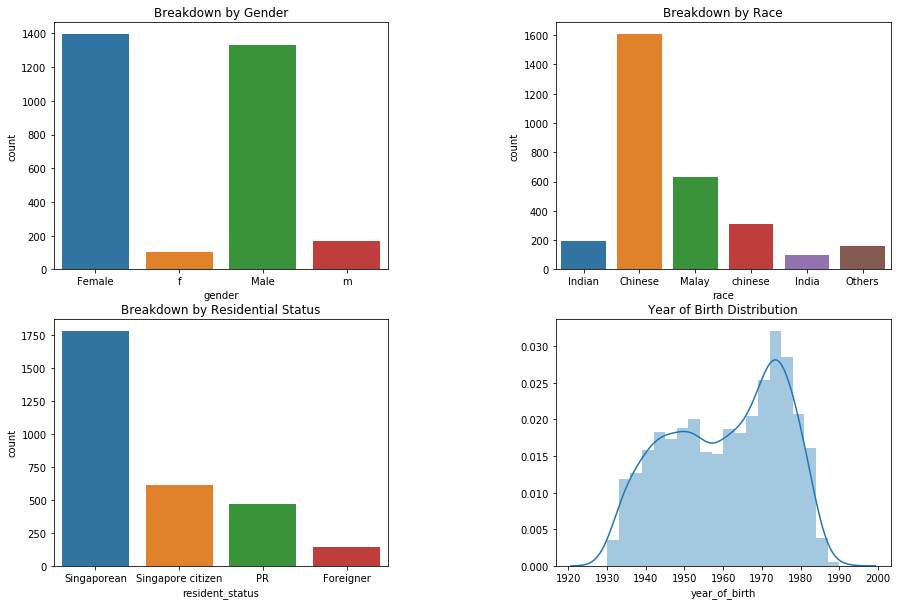

In [38]:
fig, ax = plt.subplots(2, 2, figsize = (15, 10))
fig.subplots_adjust(wspace=0.5)

sns.countplot(x='gender', data=df_demographic, ax=ax[0][0])
ax[0][0].set_title('Breakdown by Gender')

sns.countplot(x='race', data=df_demographic, ax=ax[0][1])
ax[0][1].set_title('Breakdown by Race')

sns.countplot(x='resident_status', data=df_demographic, ax=ax[1][0])
ax[1][0].set_title('Breakdown by Residential Status')

sns.distplot(df_demographic['year_of_birth'], bins=20, kde=True, ax=ax[1][1])
ax[1][1].set_title('Year of Birth Distribution')

In [39]:
# Perform some Data Correction...
# Need to change f to Female, m to Male
df_demographic['gender'].replace(['m', 'f'], ['Male', 'Female'], inplace=True)

# Need to change Singapore citizen to Singaporean
df_demographic['resident_status'].replace(['Singapore citizen'], ['Singaporean'], inplace=True)

# Need to change chinese to Chinese and India to Indian
df_demographic['race'].replace(['India', 'chinese'], ['Indian', 'Chinese'], inplace=True)

Text(0.5, 1.0, 'Year of Birth Distribution')

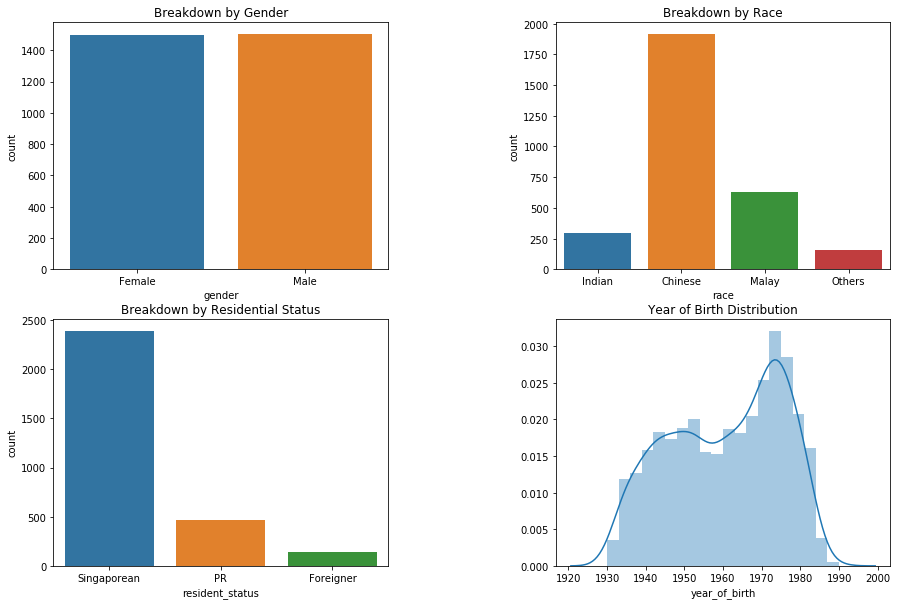

In [40]:
# Display the corrected data
fig, ax = plt.subplots(2, 2, figsize = (15, 10))
fig.subplots_adjust(wspace=0.5)

sns.countplot(x='gender', data=df_demographic, ax=ax[0][0])
ax[0][0].set_title('Breakdown by Gender')

sns.countplot(x='race', data=df_demographic, ax=ax[0][1])
ax[0][1].set_title('Breakdown by Race')

sns.countplot(x='resident_status', data=df_demographic, ax=ax[1][0])
ax[1][0].set_title('Breakdown by Residential Status')

sns.distplot(df_demographic['year_of_birth'], bins=20, kde=True, ax=ax[1][1])
ax[1][1].set_title('Year of Birth Distribution')

### NOTES:
- patient_id can be used to tie all the data together
- create a dataframe that will contain the joined tables together before performing further analysis
- age can be calculated from date of birth to the latest clinical record of admission date

## 1.3. Combine the Datasets into a Super Dataframe

### 1.3.1. Preview the Aggregated Data and Adjust Column names for join

In [41]:
# Update the columns for join later
df_bill_agg.columns = ['patient_id', 'date_of_admission_max', 'amount_min', 'amount_max',
       'amount_mean', 'amount_sum']

In [42]:
# Billing Aggregate
df_bill_agg.sample(5)

,patient_id,date_of_admission_max,amount_min,amount_max,amount_mean,amount_sum
1429,7ce8bacfbce3e4f9c2fb4b0a8ff6bcd6,2013-04-15,1480.950381,19615.395135,6286.709643,25146.838573
1263,6d2f516ae9fe90a3c1733ec5405ceb66,2014-04-10,689.870544,24119.880716,6853.559503,27414.238013
1322,7256efdbf1ab3e4d361ad3c83d6d2f44,2015-06-09,1198.509174,14729.671974,5027.976041,40223.808328
354,1cff37249569b03ae49ad9ffdf3d4c1b,2015-07-02,575.806204,17729.684224,4068.538498,32548.307987
315,196440b58b76cb36844e29e56a6789cb,2012-07-17,492.236159,9222.291255,3236.694693,12946.778773


In [43]:
# Update the columns for join later
df_clinical_agg.columns = ['patient_id', 'date_of_admission_max', 'date_of_admission_count',
       'date_of_discharge_max', 'days_of_admission_min',
       'days_of_admission_max', 'days_of_admission_mean',
       'medical_history_1_max', 'medical_history_2_max',
       'medical_history_3_max', 'medical_history_4_max',
       'medical_history_5_max', 'medical_history_6_max',
       'medical_history_7_max', 'preop_medication_1_max',
       'preop_medication_2_max', 'preop_medication_3_max',
       'preop_medication_4_max', 'preop_medication_5_max',
       'preop_medication_6_max', 'symptom_1_max', 'symptom_2_max',
       'symptom_3_max', 'symptom_4_max', 'symptom_5_max', 'lab_result_1_min',
       'lab_result_1_max', 'lab_result_1_mean', 'lab_result_2_min',
       'lab_result_2_max', 'lab_result_2_mean', 'lab_result_3_min',
       'lab_result_3_max', 'lab_result_3_mean', 'weight_min', 'weight_max',
       'weight_mean', 'height_mean']

In [44]:
# Clinical Records Aggregate
df_clinical_agg.sample(5)

,patient_id,date_of_admission_max,date_of_admission_count,date_of_discharge_max,days_of_admission_min,days_of_admission_max,days_of_admission_mean,medical_history_1_max,medical_history_2_max,medical_history_3_max,...,lab_result_2_min,lab_result_2_max,lab_result_2_mean,lab_result_3_min,lab_result_3_max,lab_result_3_mean,weight_min,weight_max,weight_mean,height_mean
2618,e064e2dc381af966aa469e105e6514d7,2015-11-26,1,2015-12-08,12,12,12.0,0,0,0,...,25.5,25.5,25.5,114.0,114.0,114.0,62.5,62.5,62.5,175.0
1341,74560a4a7658cd7b7856f83c433f9c64,2015-12-17,2,2015-12-24,7,10,8.5,0,1,0,...,23.8,25.0,24.4,97.0,106.0,101.5,97.2,98.2,97.7,163.0
1090,5cd63df69b58674d8e9c7e9534c61db9,2014-02-18,1,2014-02-28,10,10,10.0,0,1,0,...,24.6,24.6,24.6,119.0,119.0,119.0,70.1,70.1,70.1,161.0
2257,c2ba29291800364080873367d6e54914,2014-12-01,1,2014-12-09,8,8,8.0,0,0,0,...,26.3,26.3,26.3,106.0,106.0,106.0,52.7,52.7,52.7,163.0
159,0ca13ea62921c9b46990d287dcfa0671,2012-08-07,2,2012-08-16,9,15,12.0,0,1,1,...,27.6,31.0,29.3,90.0,96.0,93.0,74.9,75.9,75.4,161.0


In [45]:
df_demographic.sample(5)

,patient_id,gender,race,resident_status,date_of_birth,year_of_birth
121,d3a8ec14276d1b7d1f25214cbc979dcb,Male,Chinese,Singaporean,1975-05-20,1975
2334,65f9613559491d5ffefbb945f405feb8,Male,Chinese,Singaporean,1980-04-08,1980
801,262c4f5c0fbeb5092ff748d04c584f46,Female,Others,Singaporean,1975-10-20,1975
1556,345ffe128393fc938fdb09bd708aecc3,Male,Chinese,PR,1953-01-07,1953
1050,a89d10913aae1d07b8487f48b42fc399,Female,Chinese,Singaporean,1969-06-09,1969


### 1.3.2. Join the DataFrames

In [46]:
# Combine all 3 dataframes using patient id as key
df_super = df_demographic.set_index('patient_id').join(df_clinical_agg.set_index('patient_id')).reset_index()
df_super.sample(5)

,patient_id,gender,race,resident_status,date_of_birth,year_of_birth,date_of_admission_max,date_of_admission_count,date_of_discharge_max,days_of_admission_min,...,lab_result_2_min,lab_result_2_max,lab_result_2_mean,lab_result_3_min,lab_result_3_max,lab_result_3_mean,weight_min,weight_max,weight_mean,height_mean
2861,729e03b37465a8cc6e01932a0158a13f,Male,Malay,PR,1983-12-13,1983,2011-06-18,1,2011-07-03,15,...,27.1,27.1,27.1,116.0,116.0,116.0,89.0,89.0,89.0,174.0
791,0211593272c53dc0034e183600ea185f,Male,Chinese,Foreigner,1962-10-26,1962,2013-05-01,1,2013-05-16,15,...,25.6,25.6,25.6,131.0,131.0,131.0,88.4,88.4,88.4,174.0
394,1d7feb4e1a351ed4e7a40ebd8c0bb29a,Male,Chinese,Singaporean,1941-07-06,1941,2013-08-28,1,2013-09-05,8,...,25.3,25.3,25.3,104.0,104.0,104.0,99.9,99.9,99.9,164.0
1310,352b365b2e4b27dec8d6a6de7628735a,Male,Malay,Singaporean,1972-06-19,1972,2014-06-22,1,2014-07-03,11,...,27.3,27.3,27.3,110.0,110.0,110.0,78.0,78.0,78.0,168.0
1294,26ded1f1f758ddcee65374ebe492a0c2,Male,Malay,Singaporean,1981-07-13,1981,2013-04-25,1,2013-05-08,13,...,24.2,24.2,24.2,72.0,72.0,72.0,89.8,89.8,89.8,166.0


In [47]:
df_super = pd.merge(df_super, df_bill_agg, on=['patient_id', 'date_of_admission_max'], how='inner')
df_super.sample(5)

,patient_id,gender,race,resident_status,date_of_birth,year_of_birth,date_of_admission_max,date_of_admission_count,date_of_discharge_max,days_of_admission_min,...,lab_result_3_max,lab_result_3_mean,weight_min,weight_max,weight_mean,height_mean,amount_min,amount_max,amount_mean,amount_sum
641,430c3bbf8581188be099e506f2e33959,Female,Others,Singaporean,1960-01-26,1960,2015-01-16,1,2015-01-27,11,...,94.0,94.0,94.2,94.2,94.2,161.0,868.915177,10832.766681,5727.185160,22908.740640
2981,e9ddb4544162871176e7528cafa5bf36,Male,Malay,Singaporean,1953-09-06,1953,2015-06-22,1,2015-07-07,15,...,107.0,107.0,69.5,69.5,69.5,179.0,1092.016439,19860.254317,5941.075391,23764.301564
611,81a38d61987e640baf52a53ffb62c57e,Female,Malay,Singaporean,1931-09-04,1931,2014-06-22,1,2014-06-26,4,...,121.0,121.0,63.3,63.3,63.3,161.0,1284.322727,37452.190884,10770.218709,43080.874836
997,21ee01072c54e95350c8cba58b41b106,Male,Chinese,Singaporean,1935-09-27,1935,2013-02-02,2,2013-02-17,14,...,106.0,101.0,72.0,74.0,73.0,168.0,510.880732,24809.240097,6143.600821,49148.806566
301,10f9b05c1301f41f7f3660d32be58c48,Female,Malay,Singaporean,1962-05-23,1962,2012-08-08,1,2012-08-21,13,...,102.0,102.0,85.4,85.4,85.4,159.0,1207.141668,20548.125226,7986.108057,31944.432227


### 1.3.3. Additional Feature Engineering (Age of Patient from the Discharge Date)

In [48]:
df_super['age'] = pd.DatetimeIndex(df_super['date_of_admission_max']).year - df_super['year_of_birth']
df_super.sample(5)

,patient_id,gender,race,resident_status,date_of_birth,year_of_birth,date_of_admission_max,date_of_admission_count,date_of_discharge_max,days_of_admission_min,...,lab_result_3_mean,weight_min,weight_max,weight_mean,height_mean,amount_min,amount_max,amount_mean,amount_sum,age
210,832d8ef1da755dd527a6cf1916868de8,Male,Malay,Singaporean,1973-02-26,1973,2015-05-25,1,2015-06-11,17,...,89.0,99.4,99.4,99.4,172.0,908.417206,16594.297910,4995.078059,19980.312238,42
665,90da9a7256b779eb140287c5d0cbfc2a,Male,Chinese,Singaporean,1974-01-07,1974,2012-04-23,1,2012-05-05,12,...,104.0,68.0,68.0,68.0,171.0,320.137755,8016.020484,2515.270639,10061.082556,38
2383,bdfbf62524cf9f39ca27981e693a74af,Female,Chinese,PR,1967-10-20,1967,2014-06-21,1,2014-06-27,6,...,119.0,72.6,72.6,72.6,157.0,1001.413387,19851.345811,6148.060316,24592.241262,47
2363,23d8f5d98d0a8923791bdb76c306e559,Male,Malay,Singaporean,1939-02-14,1939,2011-03-22,1,2011-04-04,13,...,98.0,79.8,79.8,79.8,174.0,1326.207978,24714.366176,7360.915566,29443.662266,72
1225,b8a6e71e6e6e2426444dddaea7303089,Male,Chinese,Singaporean,1972-06-08,1972,2011-05-18,1,2011-05-30,12,...,84.0,84.2,84.2,84.2,166.0,1038.731621,8508.506471,2937.044640,11748.178559,39


### 1.3.4. Check the Columns and Drop the Unecessary Ones...

In [49]:
df_super.columns

Index(['patient_id', 'gender', 'race', 'resident_status', 'date_of_birth',
       'year_of_birth', 'date_of_admission_max', 'date_of_admission_count',
       'date_of_discharge_max', 'days_of_admission_min',
       'days_of_admission_max', 'days_of_admission_mean',
       'medical_history_1_max', 'medical_history_2_max',
       'medical_history_3_max', 'medical_history_4_max',
       'medical_history_5_max', 'medical_history_6_max',
       'medical_history_7_max', 'preop_medication_1_max',
       'preop_medication_2_max', 'preop_medication_3_max',
       'preop_medication_4_max', 'preop_medication_5_max',
       'preop_medication_6_max', 'symptom_1_max', 'symptom_2_max',
       'symptom_3_max', 'symptom_4_max', 'symptom_5_max', 'lab_result_1_min',
       'lab_result_1_max', 'lab_result_1_mean', 'lab_result_2_min',
       'lab_result_2_max', 'lab_result_2_mean', 'lab_result_3_min',
       'lab_result_3_max', 'lab_result_3_mean', 'weight_min', 'weight_max',
       'weight_mean', 'height_

In [50]:
# Set the Patient ID as the index
df_super = df_super.set_index('patient_id')

In [51]:
# Drop Unecessary Columns
# Dates can be dropped at this point as features related to it such as number of days and age has already been
# engineered
df_super = df_super.drop(columns=['date_of_birth', 'year_of_birth', 'date_of_admission_max', 'date_of_discharge_max'])
df_super.sample(5)

,gender,race,resident_status,date_of_admission_count,days_of_admission_min,days_of_admission_max,days_of_admission_mean,medical_history_1_max,medical_history_2_max,medical_history_3_max,...,lab_result_3_mean,weight_min,weight_max,weight_mean,height_mean,amount_min,amount_max,amount_mean,amount_sum,age
patient_id,,,,,,,,,,,,,,,,,,,,,
2a404e123b3e0ec2e60ed12dd93d5a55,Female,Chinese,Singaporean,1,14,14,14.0,0,0,0,...,118.0,87.7,87.7,87.7,157.0,1060.309624,21602.278862,7027.498773,28109.995093,63
9bc4f5f1f82794a21908ef5adfab73bc,Female,Chinese,PR,1,14,14,14.0,0,0,1,...,98.0,62.8,62.8,62.8,164.0,744.082541,10236.007180,3309.213924,13236.855696,52
056864061992174164f6b0e25faa8177,Male,Chinese,Foreigner,1,9,9,9.0,0,0,0,...,102.0,75.7,75.7,75.7,180.0,1474.002921,24250.605882,8656.379585,34625.518342,73
d224a484d4c6932ec41049232a40ddf0,Female,Chinese,Singaporean,2,8,12,10.0,0,0,1,...,89.0,78.6,80.6,79.6,165.0,306.087274,15264.724908,3364.084100,26912.672797,45
21601bcdc388bca65eddb29a34823c09,Female,Indian,PR,1,14,14,14.0,0,0,0,...,94.0,89.1,89.1,89.1,171.0,1550.330254,29432.558025,9865.723797,39462.895190,75


### 1.3.5. Check the Target Variable Distribution

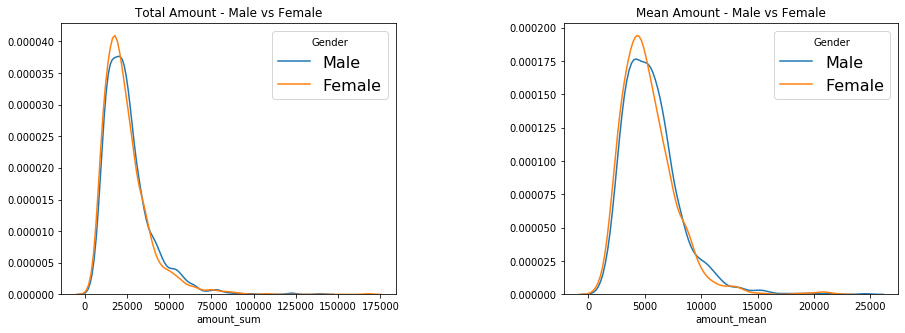

In [52]:
# Check against Gender
fig, ax = plt.subplots(1, 2, figsize = (15, 5), squeeze=False)
fig.subplots_adjust(wspace=0.5)

sns.distplot(df_super[df_super['gender']=='Male']['amount_sum'], label='Male', bins=20, hist=False, kde=True, ax=ax[0][0])
sns.distplot(df_super[df_super['gender']=='Female']['amount_sum'], label='Female', bins=20, hist=False, kde=True, ax=ax[0][0])
ax[0][0].set_title('Total Amount - Male vs Female')
ax[0][0].legend(prop={'size': 16}, title = 'Gender')

sns.distplot(df_super[df_super['gender']=='Male']['amount_mean'], label='Male', bins=20, hist=False, kde=True, ax=ax[0][1])
sns.distplot(df_super[df_super['gender']=='Female']['amount_mean'], label='Female', bins=20, hist=False, kde=True, ax=ax[0][1])
ax[0][1].set_title('Mean Amount - Male vs Female')
ax[0][1].legend(prop={'size': 16}, title = 'Gender')

### NOTES:
- statistically, females usually have higher medical spending than male
- the graphs also show in terms of total and average amount

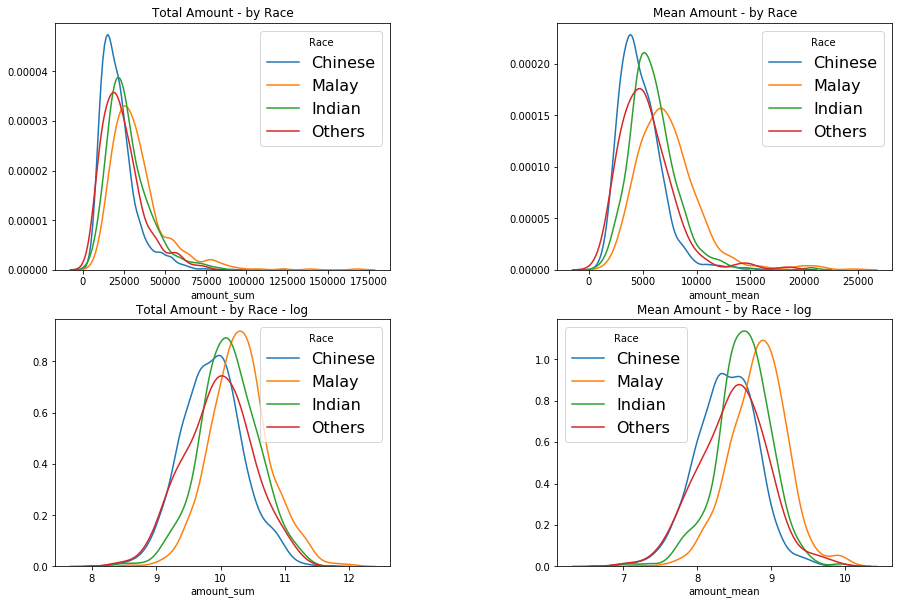

In [53]:
# Check against Race
fig, ax = plt.subplots(2, 2, figsize = (15, 10), squeeze=False)
fig.subplots_adjust(wspace=0.5)

list_race = ['Chinese', 'Malay', 'Indian', 'Others']

# Non-Log Values
for race in list_race:
    sns.distplot(df_super[df_super['race']==race]['amount_sum'], label=race, hist=False, kde=True, ax=ax[0][0])
ax[0][0].set_title('Total Amount - by Race')
ax[0][0].legend(prop={'size': 16}, title = 'Race')

for race in list_race:
    sns.distplot(df_super[df_super['race']==race]['amount_mean'], label=race, hist=False, kde=True, ax=ax[0][1])
ax[0][1].set_title('Mean Amount - by Race')
ax[0][1].legend(prop={'size': 16}, title = 'Race')

# Values in Log Scale
for race in list_race:
    sns.distplot(np.log(df_super[df_super['race']==race]['amount_sum']), label=race, hist=False, kde=True, ax=ax[1][0])
ax[1][0].set_title('Total Amount - by Race - log')
ax[1][0].legend(prop={'size': 16}, title = 'Race')

for race in list_race:
    sns.distplot(np.log(df_super[df_super['race']==race]['amount_mean']), label=race, hist=False, kde=True, ax=ax[1][1])
ax[1][1].set_title('Mean Amount - by Race - log')
ax[1][1].legend(prop={'size': 16}, title = 'Race')

### NOTES:
- based in the earlier portion of the EDA, the range of amount varies greatly from the minimum to the max
- logging the values makes it easier to evaluate the amount by race

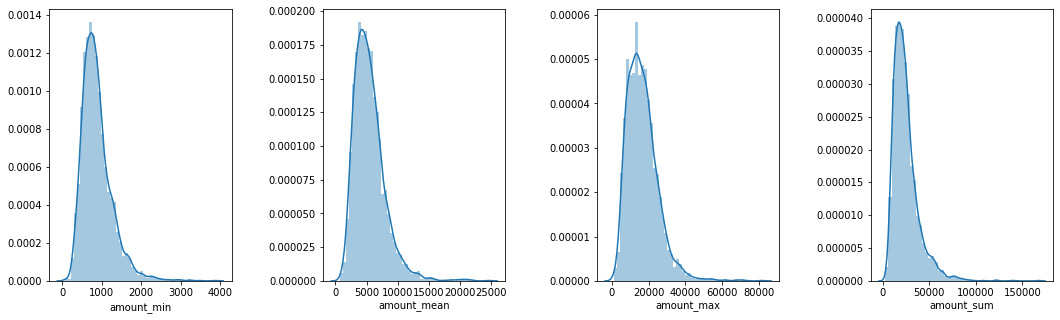

In [54]:
# Plot the Target Variables
fig, ax = plt.subplots(1, 4, figsize = (18, 5), squeeze=False)
fig.subplots_adjust(wspace=0.5)

sns.distplot(df_super['amount_min'], label=race, hist=True, kde=True, ax=ax[0][0])
sns.distplot(df_super['amount_mean'], label=race, hist=True, kde=True, ax=ax[0][1])
sns.distplot(df_super['amount_max'], label=race, hist=True, kde=True, ax=ax[0][2])
sns.distplot(df_super['amount_sum'], label=race, hist=True, kde=True, ax=ax[0][3])

# 2. Pre-Modeling and Setting Baselines

In [55]:
# Check the columns
df_super.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, fa2d818b2261e44e30628ad1ac9cc72c to 20b609609d4dbb834d722ddf29f18879
Data columns (total 43 columns):
gender                     3000 non-null object
race                       3000 non-null object
resident_status            3000 non-null object
date_of_admission_count    3000 non-null int64
days_of_admission_min      3000 non-null int64
days_of_admission_max      3000 non-null int64
days_of_admission_mean     3000 non-null float64
medical_history_1_max      3000 non-null int64
medical_history_2_max      3000 non-null int64
medical_history_3_max      3000 non-null int64
medical_history_4_max      3000 non-null int64
medical_history_5_max      3000 non-null int64
medical_history_6_max      3000 non-null int64
medical_history_7_max      3000 non-null int64
preop_medication_1_max     3000 non-null int64
preop_medication_2_max     3000 non-null int64
preop_medication_3_max     3000 non-null int64
preop_medication_4_max     3000 non

### NOTES:
- all of the fields are already numerical except for gender, race and resident status
- for preliminary modeling, can take 2 general approach:
    - 1st, utilise a decision tree model (aka random forest)
    - 2nd, use lasso and ridge regression
    - for both models, need to convert the remaining categorical values into numerical values using dummies
- models from this phase can serve as the baseline

In [56]:
df_super = pd.get_dummies(df_super)

In [57]:
df_super.columns

Index(['date_of_admission_count', 'days_of_admission_min',
       'days_of_admission_max', 'days_of_admission_mean',
       'medical_history_1_max', 'medical_history_2_max',
       'medical_history_3_max', 'medical_history_4_max',
       'medical_history_5_max', 'medical_history_6_max',
       'medical_history_7_max', 'preop_medication_1_max',
       'preop_medication_2_max', 'preop_medication_3_max',
       'preop_medication_4_max', 'preop_medication_5_max',
       'preop_medication_6_max', 'symptom_1_max', 'symptom_2_max',
       'symptom_3_max', 'symptom_4_max', 'symptom_5_max', 'lab_result_1_min',
       'lab_result_1_max', 'lab_result_1_mean', 'lab_result_2_min',
       'lab_result_2_max', 'lab_result_2_mean', 'lab_result_3_min',
       'lab_result_3_max', 'lab_result_3_mean', 'weight_min', 'weight_max',
       'weight_mean', 'height_mean', 'amount_min', 'amount_max', 'amount_mean',
       'amount_sum', 'age', 'gender_Female', 'gender_Male', 'race_Chinese',
       'race_Indian', '

## 2.1 Model 1 - Random Forest (4 models)

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [59]:
# Prepare the Target Variables
y_min = df_super['amount_min']
y_max = df_super['amount_max']
y_avg = df_super['amount_mean']
y_sum = df_super['amount_sum']

# Prepare the Independent Variables
x = df_super[['date_of_admission_count', 'days_of_admission_min',
       'days_of_admission_max', 'days_of_admission_mean',
       'medical_history_1_max', 'medical_history_2_max',
       'medical_history_3_max', 'medical_history_4_max',
       'medical_history_5_max', 'medical_history_6_max',
       'medical_history_7_max', 'preop_medication_1_max',
       'preop_medication_2_max', 'preop_medication_3_max',
       'preop_medication_4_max', 'preop_medication_5_max',
       'preop_medication_6_max', 'symptom_1_max', 'symptom_2_max',
       'symptom_3_max', 'symptom_4_max', 'symptom_5_max', 'lab_result_1_min',
       'lab_result_1_max', 'lab_result_1_mean', 'lab_result_2_min',
       'lab_result_2_max', 'lab_result_2_mean', 'lab_result_3_min',
       'lab_result_3_max', 'lab_result_3_mean', 'weight_min', 'weight_max',
       'weight_mean', 'height_mean', 'age', 'gender_Female', 'gender_Male', 'race_Chinese',
       'race_Indian', 'race_Malay', 'race_Others', 'resident_status_Foreigner',
       'resident_status_PR', 'resident_status_Singaporean']]

In [60]:
# Save the Column Names
list_columns = ['date_of_admission_count', 'days_of_admission_min',
       'days_of_admission_max', 'days_of_admission_mean',
       'medical_history_1_max', 'medical_history_2_max',
       'medical_history_3_max', 'medical_history_4_max',
       'medical_history_5_max', 'medical_history_6_max',
       'medical_history_7_max', 'preop_medication_1_max',
       'preop_medication_2_max', 'preop_medication_3_max',
       'preop_medication_4_max', 'preop_medication_5_max',
       'preop_medication_6_max', 'symptom_1_max', 'symptom_2_max',
       'symptom_3_max', 'symptom_4_max', 'symptom_5_max', 'lab_result_1_min',
       'lab_result_1_max', 'lab_result_1_mean', 'lab_result_2_min',
       'lab_result_2_max', 'lab_result_2_mean', 'lab_result_3_min',
       'lab_result_3_max', 'lab_result_3_mean', 'weight_min', 'weight_max',
       'weight_mean', 'height_mean', 'age', 'gender_Female', 'gender_Male', 'race_Chinese',
       'race_Indian', 'race_Malay', 'race_Others', 'resident_status_Foreigner',
       'resident_status_PR', 'resident_status_Singaporean']

In [61]:
# Split the Data (Min Amount)
x_train, x_test, y_train_min, y_test_min = train_test_split(x, y_min, test_size=0.2, random_state=42)

# Train and Predict
rf_min = RandomForestRegressor(n_estimators=100, n_jobs=-1, verbose=1)
rf_min.fit(x_train, y_train_min)

rf_min.score(x_test, y_test_min)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


0.6859239440834166

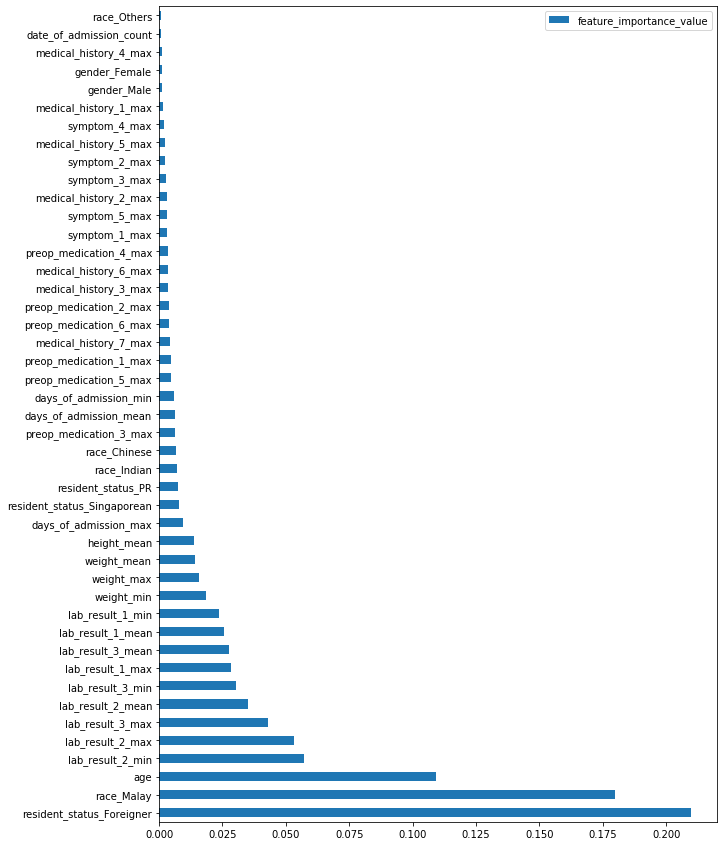

In [62]:
df_features_min = pd.DataFrame(columns=list_columns, data=rf_min.feature_importances_.reshape(1,-1)).T
df_features_min.columns = ['feature_importance_value']
df_features_min.sort_values(by='feature_importance_value', ascending=False).plot(kind='barh', figsize=(10,15))

In [63]:
df_features_min.columns

Index(['feature_importance_value'], dtype='object')

In [64]:
# Split the Data (Max Amount)
x_train, x_test, y_train_max, y_test_max = train_test_split(x, y_max, test_size=0.2, random_state=42)

# Train and Predict
rf_max = RandomForestRegressor(n_estimators=100, n_jobs=-1, verbose=1)
rf_max.fit(x_train, y_train_max)

rf_max.score(x_test, y_test_max)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


0.9071098276337545

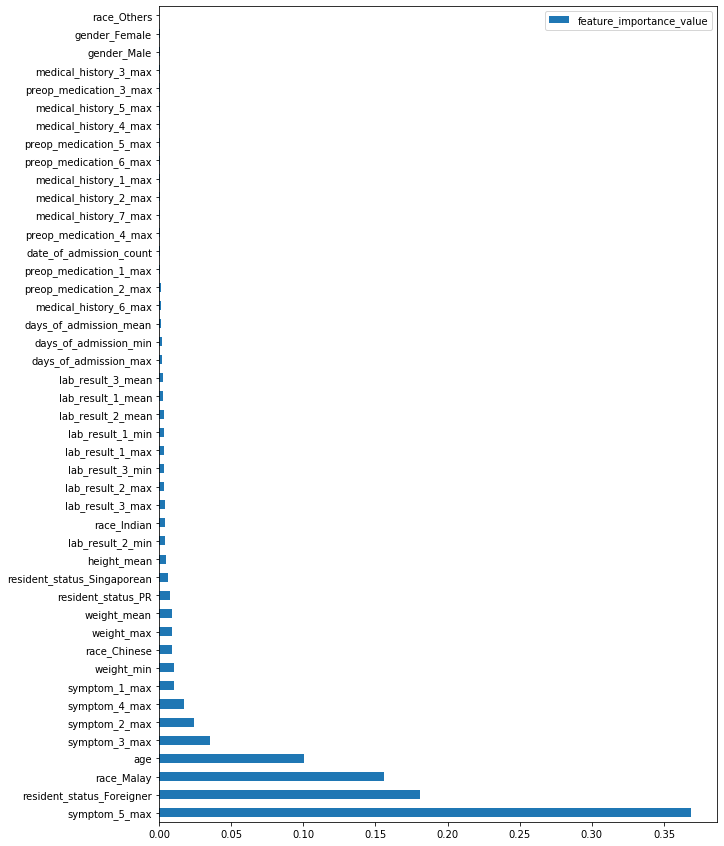

In [65]:
df_features_max = pd.DataFrame(columns=list_columns, data=rf_max.feature_importances_.reshape(1,-1)).T
df_features_max.columns = ['feature_importance_value']
df_features_max.sort_values(by='feature_importance_value', ascending=False).plot(kind='barh', figsize=(10,15))

In [66]:
# Split the Data (Mean Amount)
x_train, x_test, y_train_avg, y_test_avg = train_test_split(x, y_avg, test_size=0.2, random_state=42)

# Train and Predict
rf_avg = RandomForestRegressor(n_estimators=100, n_jobs=-1, verbose=1)
rf_avg.fit(x_train, y_train_avg)

rf_avg.score(x_test, y_test_avg)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


0.8162229965099654

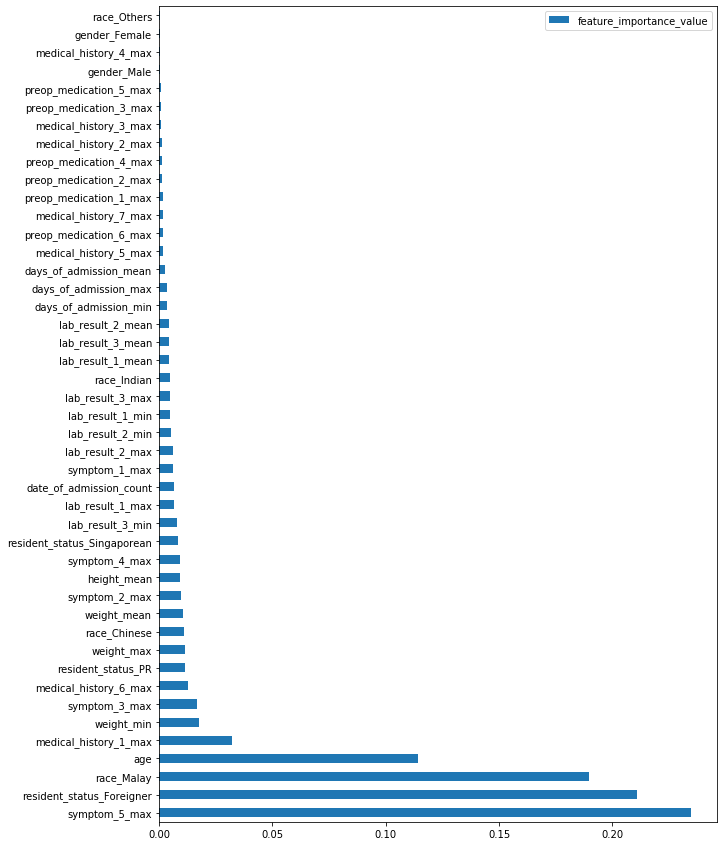

In [67]:
df_features_avg = pd.DataFrame(columns=list_columns, data=rf_avg.feature_importances_.reshape(1,-1)).T
df_features_avg.columns = ['feature_importance_value']
df_features_avg.sort_values(by='feature_importance_value', ascending=False).plot(kind='barh', figsize=(10,15))

In [68]:
# Split the Data (Total Amount)
x_train, x_test, y_train_sum, y_test_sum = train_test_split(x, y_sum, test_size=0.2, random_state=42)

# Train and Predict
rf_sum = RandomForestRegressor(n_estimators=100, n_jobs=-1, verbose=1)
rf_sum.fit(x_train, y_train_sum)

rf_sum.score(x_test, y_test_sum)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


0.8475782403561631

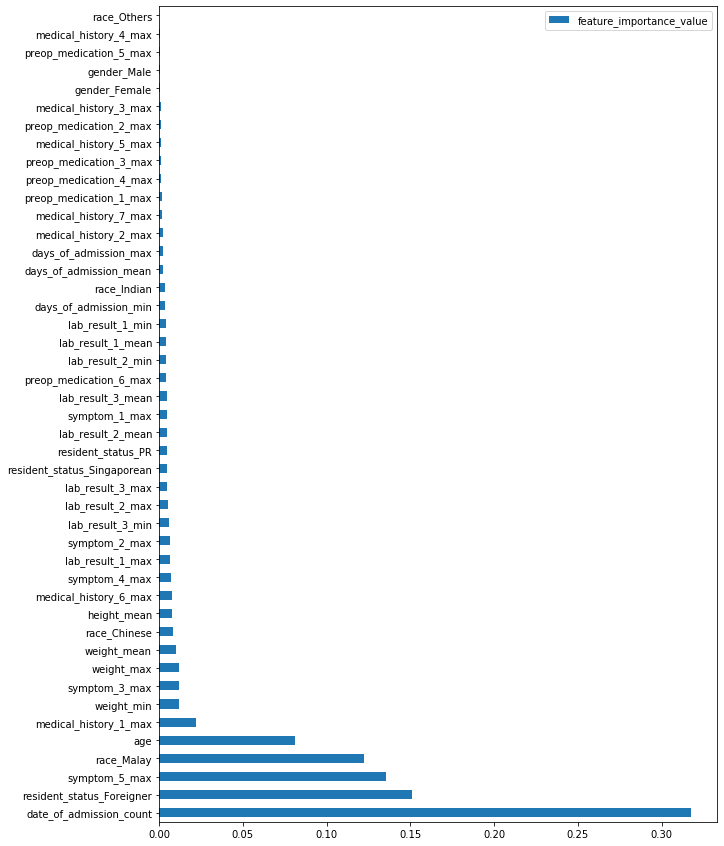

In [69]:
df_features_sum = pd.DataFrame(columns=list_columns, data=rf_sum.feature_importances_.reshape(1,-1)).T
df_features_sum.columns = ['feature_importance_value']
df_features_sum.sort_values(by='feature_importance_value', ascending=False).plot(kind='barh', figsize=(10,15))

NOTES:
- among the target variables, the minimum amount is the least in terms of prediction
- criterion used is rmse
- refer to feature importance, not necessarily an indication of features unlike coefficients from lasso or ridge but this should give us a good feel for each
- looking at the feature importances for 4 models, there is a pattern, age, malay race and foreigners seems to be an important factor for higher cost

## 2.2 Model 2 - Ridge(4 models)

In [70]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [71]:
ridge_min = Ridge(alpha=0.1, normalize=True)
ridge_min.fit(x_train,y_train_min)
pred_min = ridge_min.predict(x_test)

mean_min = mean_squared_error(y_test_min, pred_min) 
rmse_min = np.sqrt(mean_squared_error(y_test_min,pred_min))
rmse_min

241.1853175794675

In [72]:
ridge_mean = Ridge(alpha=0.1, normalize=True)
ridge_mean.fit(x_train,y_train_avg)
pred_mean = ridge_min.predict(x_test)

mean_mean = mean_squared_error(y_test_avg, pred_mean) 
rmse_mean = np.sqrt(mean_squared_error(y_test_avg,pred_mean))
rmse_mean

4973.46557176722

In [73]:
ridge_max = Ridge(alpha=0.1, normalize=True)
ridge_max.fit(x_train,y_train_max)
pred_max = ridge_max.predict(x_test)

mean_max = mean_squared_error(y_test_max, pred_max) 
rmse_max = np.sqrt(mean_squared_error(y_test_max,pred_max))
rmse_max

2073.5260761169734

In [74]:
ridge_sum = Ridge(alpha=0.1, normalize=True)
ridge_sum.fit(x_train,y_train_sum)
pred_sum = ridge_min.predict(x_test)

mean_sum = mean_squared_error(y_test_sum, pred_sum) 
rmse_sum = np.sqrt(mean_squared_error(y_test_sum,pred_sum))
rmse_sum

25875.267096501877

Additional things to do if there is more time:
- re-evaluation of the models plus lasso
- hyper parameter tuning
- statistical tests
- more analysis and graphs